# Automatic Differentiation

### A simple example

#### Differentiating the function  y=2x<sup>T</sup>x  with respect to the column vector  x

In [1]:
import tensorflow as tf

In [2]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [3]:
x = tf.Variable(x)
x

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [4]:
# calculate y
# record all computations onto a tape
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes = 1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

#### we can automatically calculate the gradient of y with respect to each component of x

In [5]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [6]:
x_grad == 4*x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [7]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
y, t.gradient(y, x)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>)

### Backward of Non-Scalar Variables

In [8]:
x

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [9]:
with tf.GradientTape() as t:
    y = x * x
t.gradient(y, x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

### Detaching Computation

In [10]:
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x
x_grad = t.gradient(z, x)
x_grad == u, y, u
    

(<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>)

In [11]:
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

### Computing the Gradient of Python Control Flow

In [33]:
def f(a):
    b =  2 * a
#     print(f"b: {b}")
    while tf.norm(b) < 1000:
        b =  2 * b
#     print(b)
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

In [34]:
# compute the gradient
a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape(persistent=True) as t:
    d = f(a)
d_grad = t.gradient(d, a)
a, d_grad

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.042389087>,
 <tf.Tensor: shape=(), dtype=float32, numpy=32768.0>)

In [35]:
d_grad == d/a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [36]:
x = tf.Variable(tf.random.normal((5,), dtype=tf.float32))
x, t.gradient(d, x)

(<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
 array([ 0.31048232, -0.8214388 ,  1.2266138 , -0.28215957, -0.84520173],
       dtype=float32)>,
 None)

In [32]:
print(t.gradient(d, x))

None


In [17]:
j = tf.range(5, dtype=tf.float32)
j = tf.Variable(j)
j

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

In [18]:
k = 2 * j
k

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 2., 4., 6., 8.], dtype=float32)>

In [22]:
tf.norm(k), k.shape.as_list()

(<tf.Tensor: shape=(), dtype=float32, numpy=10.954452>, [5])

In [25]:
tf.reduce_sum(k), k

(<tf.Tensor: shape=(), dtype=float32, numpy=20.0>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 2., 4., 6., 8.], dtype=float32)>)

In [24]:
tf.reduce_sum([[1, 2, 3], [4, 5, 6]])

<tf.Tensor: shape=(), dtype=int32, numpy=21>

In [28]:
f(k)

b: [ 0.  4.  8. 12. 16.]
tf.Tensor([   0.  256.  512.  768. 1024.], shape=(5,), dtype=float32)


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([   0.,  256.,  512.,  768., 1024.], dtype=float32)>

#### Let  f(x)=sin(x) . Plot  f(x)  and  df(x)dx , where the latter is computed without exploiting that  f′(x)=cos(x) .

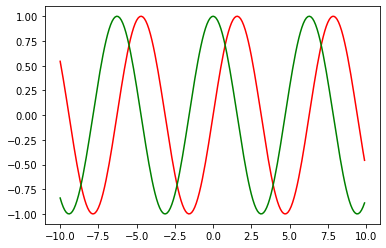

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.range(-10, 10, 0.1)
x = tf.Variable(x)

with tf.GradientTape() as t:
    y = tf.math.sin(x)

x_grad = t.gradient(y, x)

# plotting
x = x.numpy()
plt.figure(1)
plt.plot(x, y.numpy(), color='r')
plt.plot(x, x_grad.numpy(), color='g')
plt.show()